<h1 style="text-align: center;">Human Resource Analytics<h1>

<h3>Overview of the Project:</h3>

The HR Analytics project focuses on interpreting organizational data to identify people-related trends, helping the HR department address challenges like employee attrition. By utilizing machine learning models, it predicts potential attrition cases, allowing HR to take proactive steps to retain employees and maintain smooth operations. The project involves data cleaning tasks such as removing redundant columns, renaming, handling duplicates, cleaning individual columns, and addressing NaN values. It also includes data visualization to analyze key factors like overtime, marital status, job role, and other employee attributes.

<h5>Let's Dive Into Analysis</h5>

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re                               # regex pattern matching
import os                               # Allows interaction with the operating system

import warnings
warnings.filterwarnings("ignore")       # Ignoring warnings

In [7]:
# loading the data and converting it into a dataframe
data = pd.read_csv("Human_Resources.csv",encoding='ISO-8859-1')
emp_df = pd.DataFrame(data)


In [6]:
# seeing the topview of the data
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
# checking the data info
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<h5>Data Cleaning:</h5>

In [8]:
# we are going to drop the null value
emp_df.dropna()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [9]:
# Using describe() to generate summary statistics for numerical columns in the DataFrame,
emp_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<h3>Data Visualization</h3>

<h5>Plot a correlation map for all numeric variables</h5>

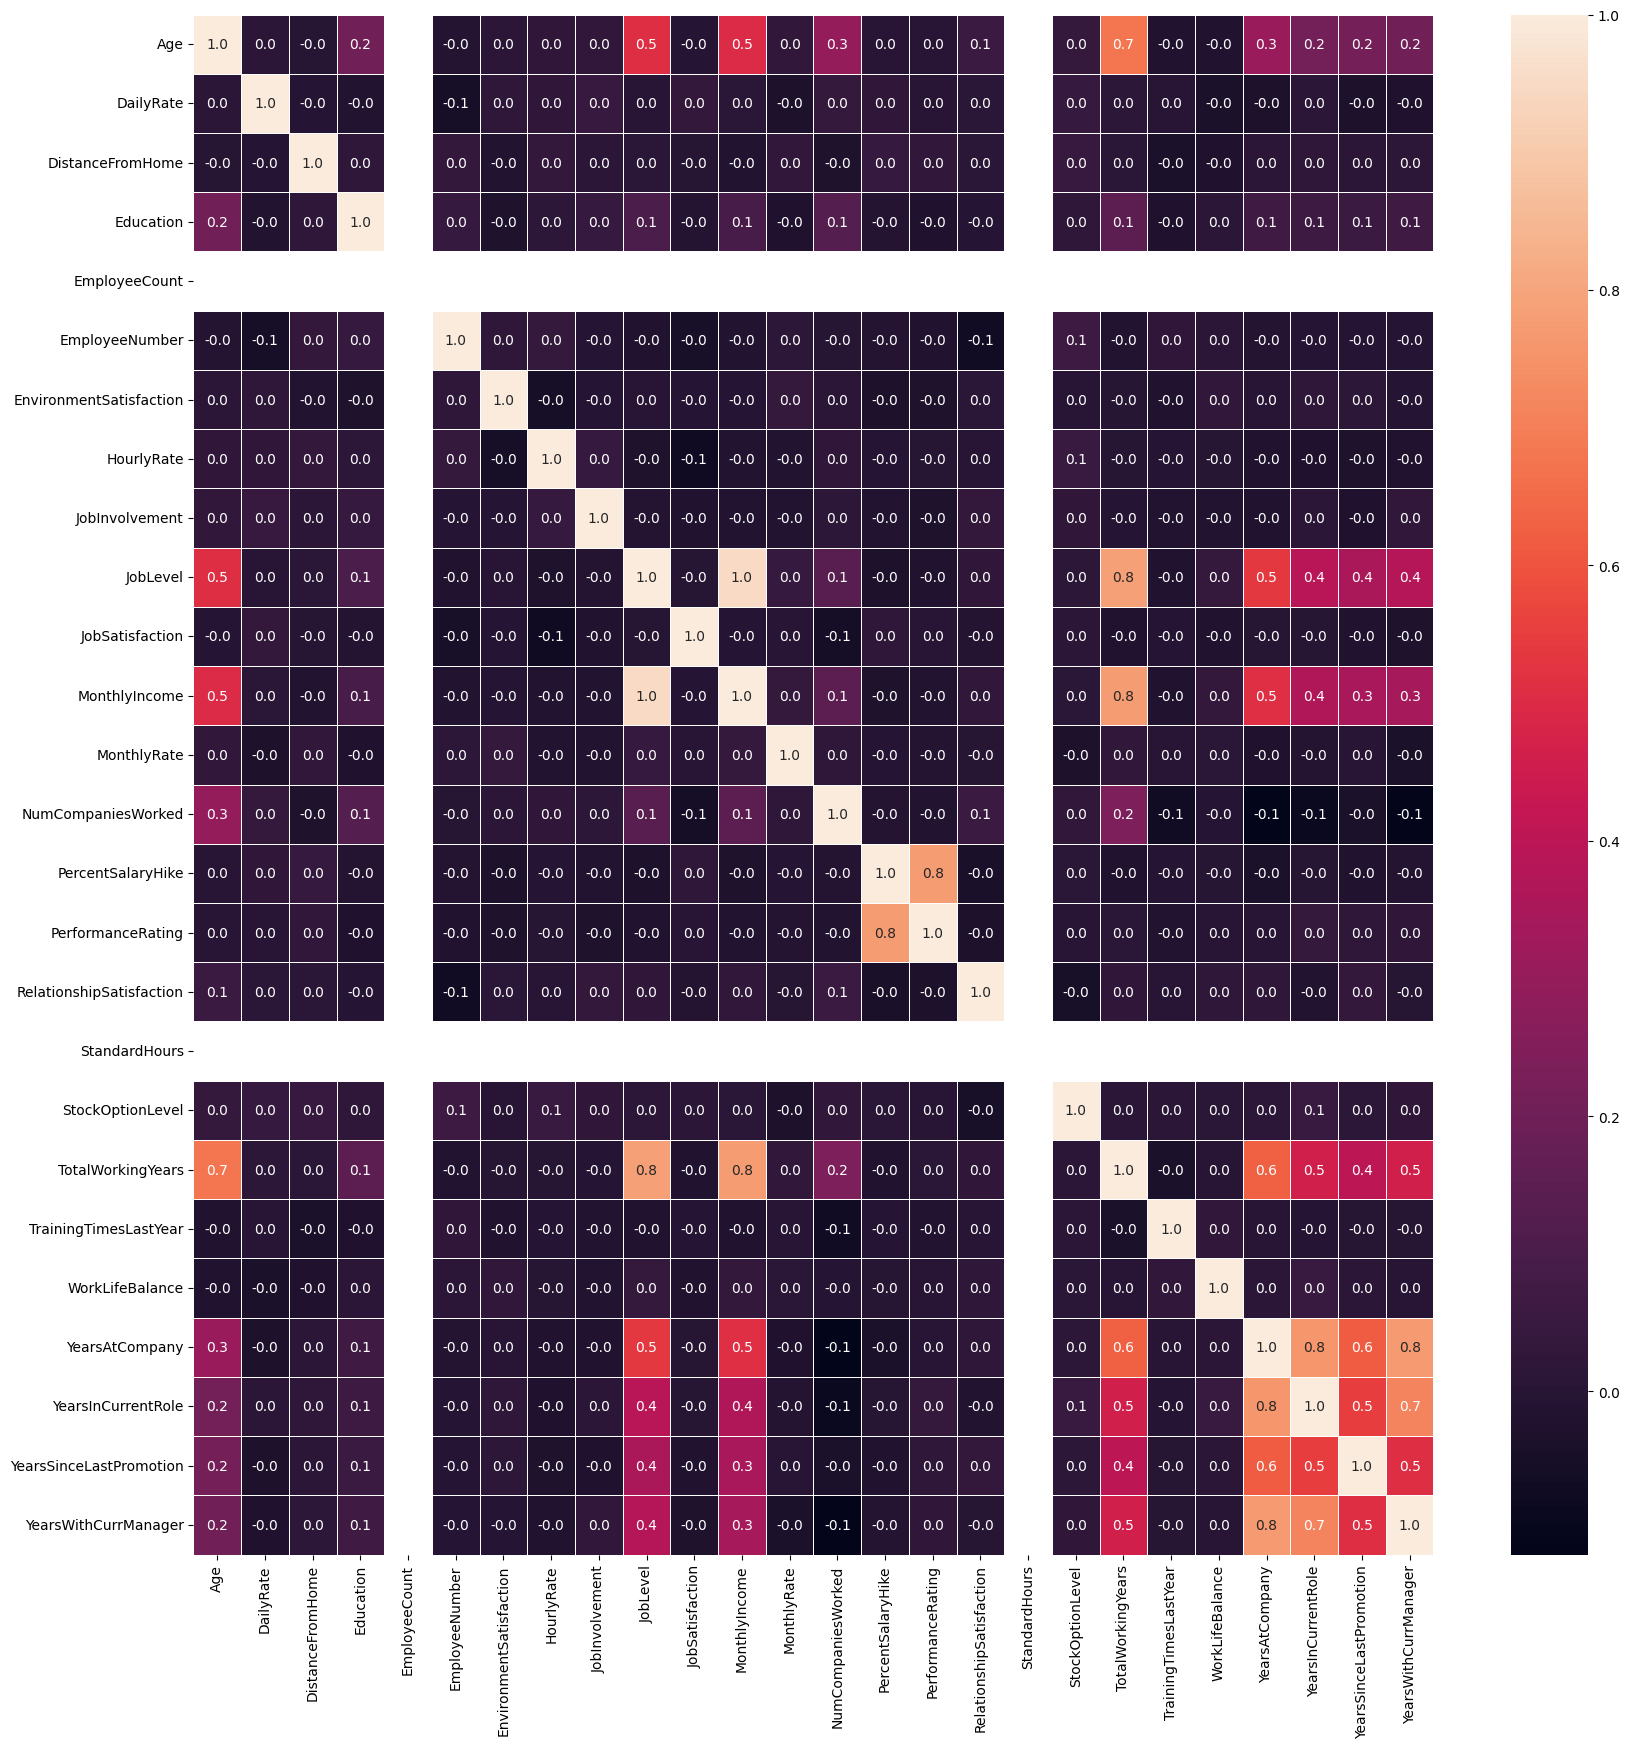

In [10]:
f,ax = plt.subplots(figsize=(20,20))
data_drop = emp_df.drop(['Attrition' ,'BusinessTravel', 'Department' ,'EducationField', 'Gender', 'JobRole' ,'MaritalStatus', 'Over18', 'OverTime'],axis=1)
sns.heatmap(data_drop.corr(),annot=True,linewidths=.5,fmt='0.1f',ax=ax)
plt.show()

The correlation heatmap visualizes relationships among numerical features in the employee dataset, revealing strong correlations like TotalWorkingYears and Age, suggesting experienced employees are generally older. Moderate correlations, such as between DistanceFromHome and JobInvolvement, indicate that living farther from work may affect engagement. These insights help HR identify factors influencing employee behavior, informing strategies to improve retention and job satisfaction.

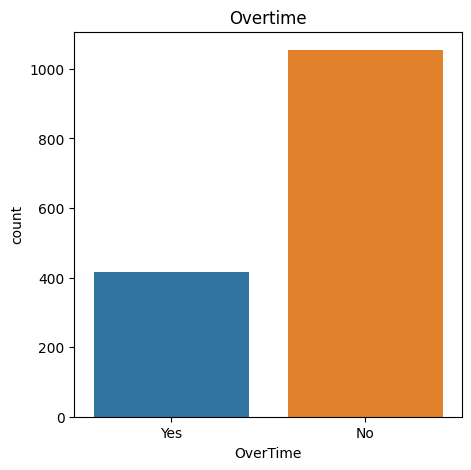

In [11]:
# Count of people doing overtime

# overtime_emp = emp_df.groupby('OverTime')['EmployeeCount'].count().reset_index()
# sns.barplot(x='OverTime',y='EmployeeCount',data=overtime_emp)
# plt.title("Overtime")

sns.countplot(x='OverTime',data=emp_df)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title("Overtime")
plt.show()

The count of people doing overtime < The count of people not doing overtime

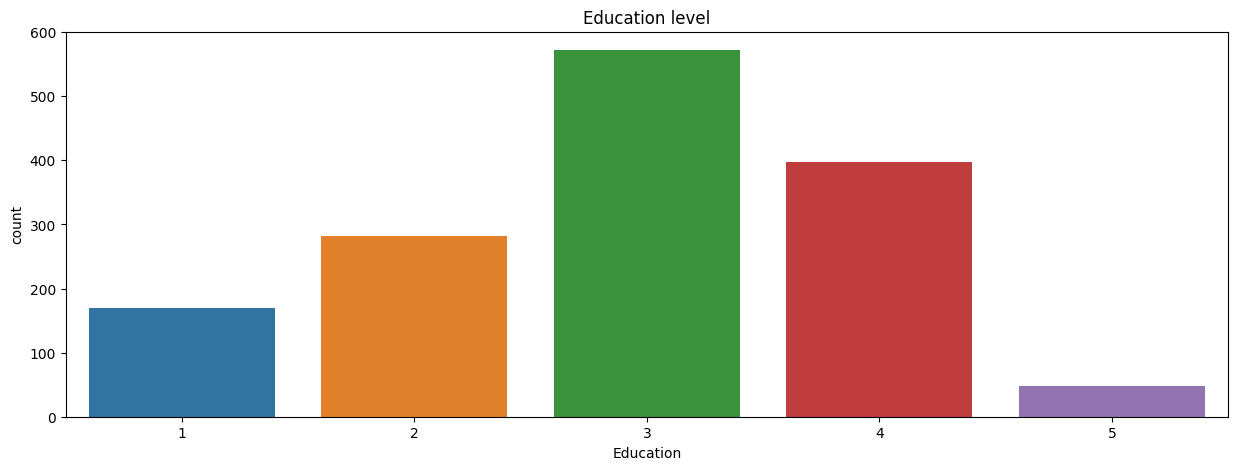

In [31]:
# Count number of people based on their education
sns.countplot(x='Education',data=emp_df)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('Education level')
plt.show()


The count plot shows the distribution of employees across education levels, with the majority holding levels 3, 4, 2, 1, and 5 in that order. This indicates a prevalence of moderate qualifications, suggesting opportunities for tailored training programs to enhance employee skills and support career advancement.

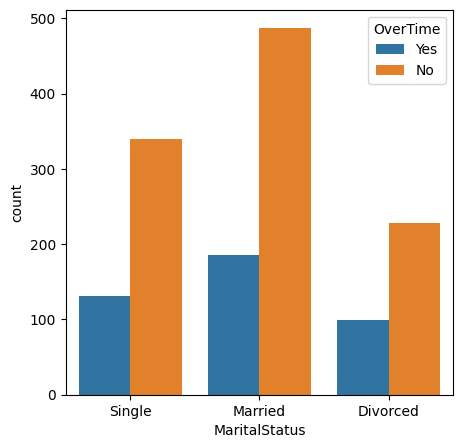

In [13]:
# Count people based on their marital status
sns.countplot(x='MaritalStatus',hue='OverTime',data = emp_df)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

The count plot shows employee distribution by marital status (Single, Married, Divorced) and overtime status, indicating that married employees are the most numerous, particularly among those not working overtime, suggesting a potential influence of marital status on overtime work patterns.

In [14]:
# Getting the employee ids of the people who are the singles
morattu_singles = emp_df[emp_df['MaritalStatus']=='Single']
print("Id's of the employees who are single:\n")
morattu_singles['EmployeeNumber']

Id's of the employees who are single:



0          1
2          4
5          8
8         12
11        15
        ... 
1454    2046
1455    2048
1460    2054
1463    2057
1464    2060
Name: EmployeeNumber, Length: 470, dtype: int64

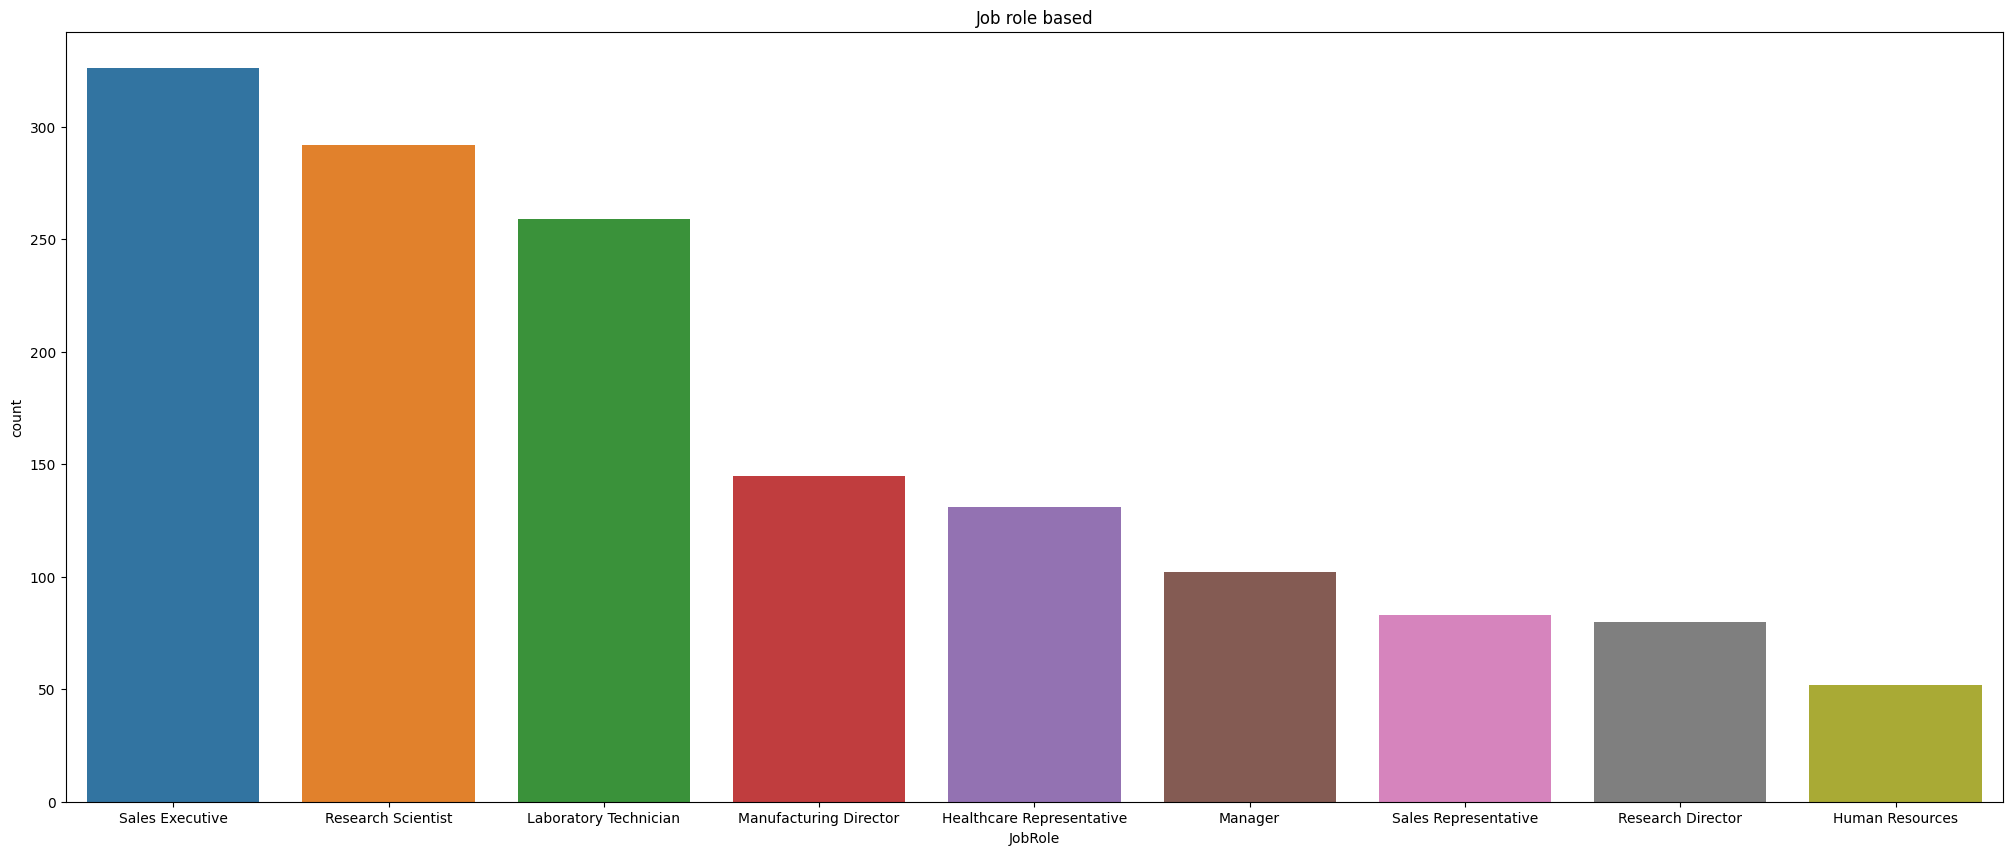

In [15]:
# Count of people based on their job role
plt.tight_layout()
sns.countplot(x='JobRole',data = emp_df)
fig = plt.gcf()
fig.set_size_inches(25,10)
plt.title('Job role based')
plt.show()


The count plot reveals that Sales Executive and Research Scientist are the most common job roles, while Research Director and Human Resources have the fewest employees, indicating a diverse workforce.

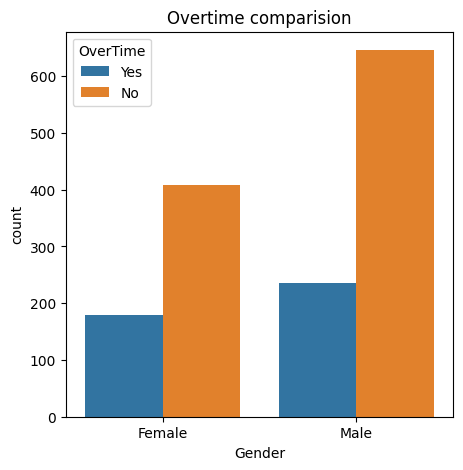

In [16]:
# Count people based on their gender
sns.countplot(x='Gender',hue='OverTime',data=emp_df)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Overtime comparision')
plt.show()


The count plot compares overtime work by gender, showing that more males work overtime than females, with both genders having a higher count of employees not working overtime, indicating potential differences in workload or roles.

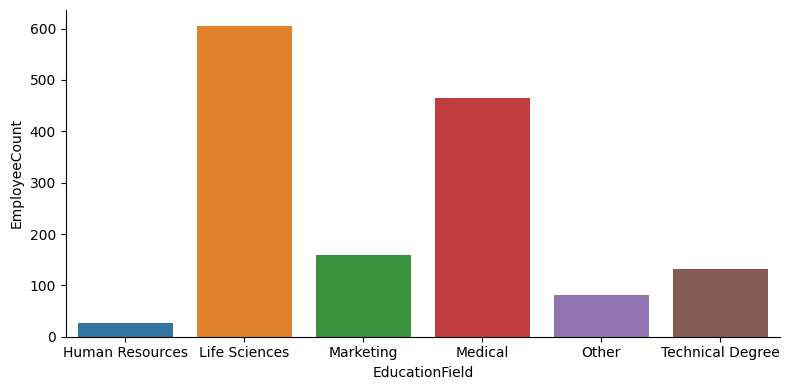

In [17]:
# Count of people based on their field of education
df = emp_df.groupby('EducationField')['EmployeeCount'].count().reset_index()
sns.catplot(x='EducationField',y='EmployeeCount',kind='bar',height=4,aspect=2,data=df)
plt.show()

# Count of people based on their education field of education
# sns.countplot(x='EducationField',data=emp_df)
# fig = plt.gcf()
# fig.set_size_inches(10,5)
# plt.show()


The bar plot shows employee distribution by education field, with Life Science, Medical, and Marketing having the highest counts, followed by Technical Degree, Other, and Human Resource. This highlights a strong representation in life sciences and medical fields, guiding recruitment and training strategies.

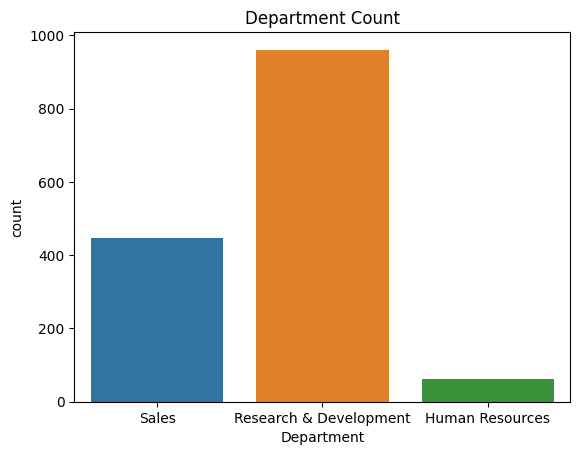

In [19]:
# Count number of people according to department which they work
sns.countplot(x='Department',data=emp_df)
plt.title('Department Count')
plt.show()

# dept_count = emp_df.groupby('Department')['EmployeeCount'].count().reset_index()
# sns.catplot(x='Department',y='EmployeeCount',kind='bar',height=5,aspect=2,data=dept_count)
# plt.show()

The count plot shows employee distribution by department, with Research and Development leading, followed by Sales and Human Resources, indicating a strong emphasis on R&D within the organization.

<Axes: xlabel='BusinessTravel', ylabel='count'>

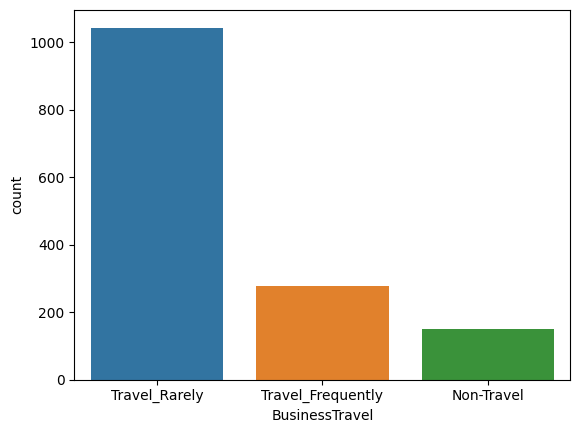

In [21]:
# Count number of people based on their travel frequency
sns.countplot(x='BusinessTravel',data=emp_df)
plt.show()

The count plot shows employee distribution by business travel frequency, with "Travel Rarely" leading, followed by "Travel Frequently" and "Non-Travel," indicating most employees have limited travel requirements.

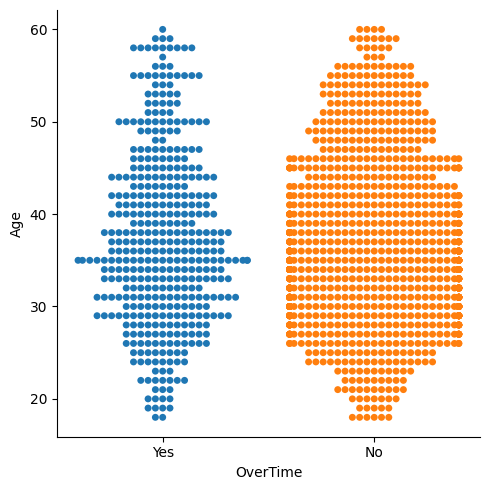

In [22]:
# Analyze people doing overtime based on their age group

# doing_overtime = emp_df.groupby('OverTime')['Age'].count().reset_index()
# sns.catplot(x='Age',y='OverTime',kind='bar',height=5,data=doing_overtime)
# plt.show()

sns.catplot(x='OverTime',y='Age',kind='swarm',hue='OverTime',data=emp_df)
plt.show()


The swarm plot shows age distribution by overtime status, indicating that employees not working overtime are more numerous, suggesting older employees may prefer a better work-life balance.

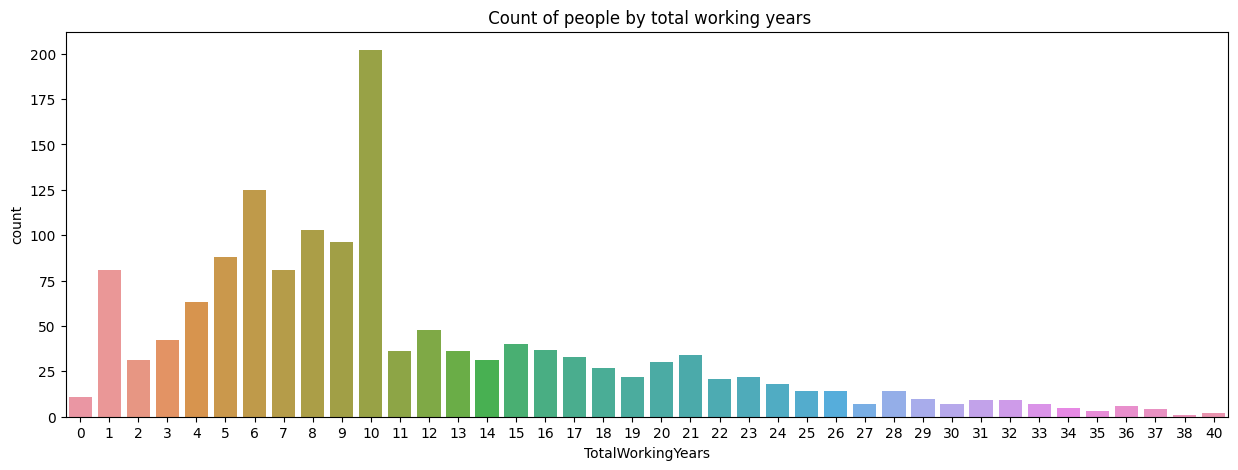

In [30]:
# Count of people based on their total working years
sns.countplot(x='TotalWorkingYears',data=emp_df)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title(" Count of people by total working years")
plt.show()

The chart shows most people have 5 to 10 years of experience, peaking at 10 years. There’s a decline after 15 years, with few having over 30 years. Mid-career professionals dominate, while early-career and highly experienced individuals are less common.

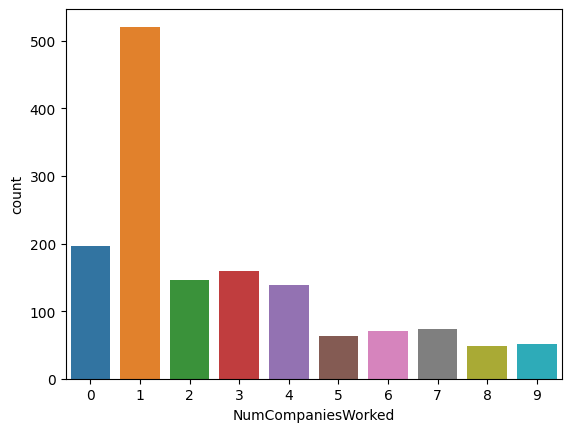

In [33]:
# Count number of companies employees worked
sns.countplot(x='NumCompaniesWorked',data=emp_df)
plt.show()


The chart shows most people have worked for 1 company, with fewer job changes beyond that. A significant number have worked for 0 to 3 companies, while very few have worked for 5 or more.

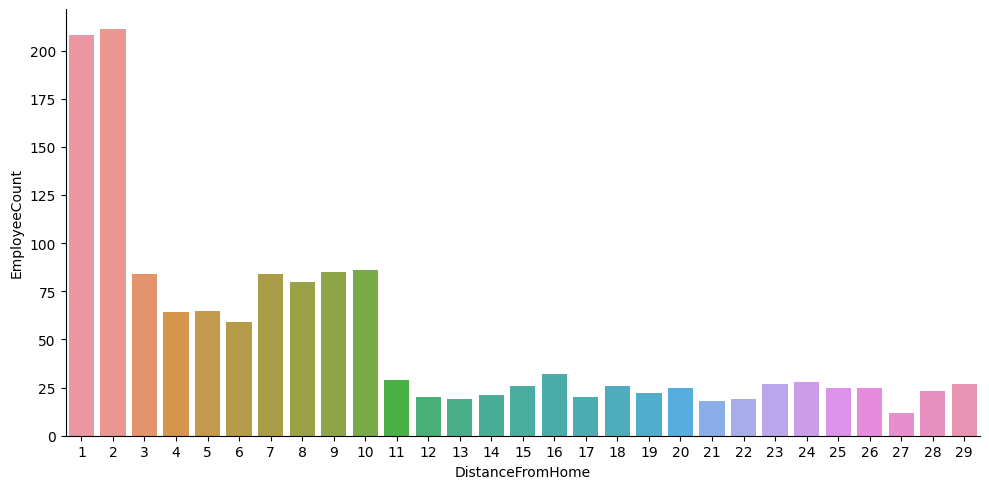

In [44]:
# Count distance from home of employees
distance_emp = emp_df.groupby('DistanceFromHome')['EmployeeCount'].count().reset_index()
sns.catplot(x='DistanceFromHome',y='EmployeeCount',kind='bar',height=5,aspect=2,data=distance_emp)
plt.show()


The chart shows most employees live 1 to 2 units from work, with the number decreasing as distance increases. Few employees live beyond 10 units away.

<h4>Conclusion:</h4>

This HR Analytics project effectively interprets organizational data to identify trends related to employee behavior and attrition. Through data cleaning and visualizations, we highlighted key factors such as overtime, marital status, and education fields that influence employee dynamics. The deployment of machine learning models to predict attrition provides valuable insights for HR, enabling proactive retention strategies. Overall, the findings emphasize the importance of data-driven decision-making in fostering a productive and engaged workforce